# Experimental Methodology in Natural Language Processing


## Objectives

- Understanding 
    - the role and types of evaluation in NLP/ML
    - the lower and upper bounds of performance
    - correct usage of data for experimentation
    - evaluation metrics
    
- Learning how to use `scikit-learn` to perform a text classification experiment
    - provided baselines
    - text vectorization
    - evaluation methods

### Requirements
- [scikit-learn](https://scikit-learn.org/)
    - run `pip install scikit-learn`

## 1. Basic Concepts of Experimental Method

### 1.1. Lower & Upper Bounds of the Performance

#### Lower Bound: Baseline
Trivial solution to the problem: 

- _random_: random decision
- _chance_: random decision w.r.t. the distribution of categories in the training data
- _majority_: assign everything to the largest category etc.
- or the *state-of-the-art* model that you want to beat

#### Upper Bound: Inter-rater agreement
Usually human performance.

A system is expected to perform within the lower and upper bounds.
            

### 1.2. Data Split

#### 1.2.1. Training-Testing Split

Often Data Set is split into the following parts:

- _Training_: for training / extracting rules / etc.
- _Development_ (Validation, or simply Dev): for optimization / intermediate evaluation
- _Testing_: for the final evaluation 

#### 1.2.1. [K-Fold Cross-Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))
In k-fold cross-validation, the original sample is randomly partitioned into $k$ equal sized subsamples. Of the $k$ subsamples, a single subsample is retained as the validation data for testing the model, and the remaining $k − 1$ subsamples are used as training data. The cross-validation process is then repeated $k$ times, with each of the $k$ subsamples used exactly once as the validation data. The $k$ results can then be averaged to produce a single estimation.

\*
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png " alt="kfold" width="500"/>

\*Image from https://scikit-learn.org/stable/modules/cross_validation.html

- Random K-Fold Cross-Validation splits data into $K$ equal folds
- Stratified K-Fold Cross-Validation additionally makes sure that the distribution of target labels is similar across different folds

The general procedure is as follows:

- Shuffle the dataset randomly
- Split the dataset into $k$ folds
- For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
- Summarize the model performance averaging the evaluation scores

## 2. Evaluation Metrics

### 2.1. Contingency Table

A [contingency table](https://en.wikipedia.org/wiki/Contingency_table) (also known as a _cross tabulation_ or _crosstab_) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. For the binary classification into positive (_POS_) and negative (_NEG_) classes, the predictions of a model (_HYP_, for hypotheses) with respect to the true labels (_REF_, for referencens) can be represented as the  matrix.

|     |         | REF     |         |
|-----|---------|:-------:|:-------:|
|     |         | __POS__ | __NEG__ |
| HYP | __POS__ | TP      | FP      |
|     | __NEG__ | FN      | TN      |


Where:
- __TP__: True Positives (usually denoted as $a$)
- __FP__: False Positivea ($b$)
- __FN__: False Negatives ($c$)
- __TN__: True Negativea ($d$)

### 2.1. The Simplest Case: Accuracy

$$ \text{Accuracy} = \frac{\text{Num. of Correct Decisions}}{\text{Total Num. of Instances}} $$

- Known number of instances
- Single decision for each instance 
- Single correct answer for each instance 
- All errors are equal

$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}}$$

__What if TN is infinite or unknown?__

e.g.: Number of irrelevant queries to a search engine

### 2.2. Precision & Recall

|     |         | REF     |         |             |
|-----|---------|:-------:|:-------:|-------------|
|     |         | __POS__ | __NEG__ |             |
| HYP | __POS__ | TP      | FP      | _Precision_ |
|     | __NEG__ | FN      | TN      |             |
|     |         | _Recall_ |        |             |


$$ \text{Precison} = \frac{\text{TP}}{\text{TP}+\text{FP}}$$

$$ \text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}$$

<img src="https://miro.medium.com/max/878/1*Ub0nZTXYT8MxLzrz0P7jPA.png" width="800"/>


__2 Values__: 

Precision-Recall Trade-Off

### 2.3. F-Measure

- Harmonic Mean of Precision & Recall 
- Usually evenly weighted


$$F_{\beta} = \frac{(1 + \beta^2) ∗ \text{Precision} ∗ \text{Recall}}{\beta^2 ∗ \text{Precision} + \text{Recall}}$$

Most common value of $\beta = 1$

$ F_1 = \frac{2 ∗ \text{Precision} ∗ \text{Recall}}{\text{Precision} + \text{Recall}}$

### 2.4. Micro, Macro and (Macro-) Weighted Averaging

In a Multi-Class setting per-class scores are averaged to produce a single score.
There are several ways the scores could be averaged. 

__Micro Averaging__

We compute scores summing over True Positive, True Negative, False Positive and False Negatives.

__Macro Averaging__

We first compute scores per class, then average the scores ignoring their distribution in the test set.

__(Macro-) Weighted Averaging__

Similar to Macro Averaging, but we additionally weight the scores by the class-frequency.

#### Precision Example

Let's assume we have 3 classes. The precision formula from above is:

$$ \text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}$$

$$\text{Micro Precision} = \frac{\text{TP}_1 + \text{TP}_2 +\text{TP}_3}{(\text{TP}_1 + \text{TP}_2 +\text{TP}_3)+(\text{FP}_1 + \text{FP}_2 +\text{FP}_3)}$$

$$\text{Macro Precision} = \frac{P_1 + P_2 + P_3}{3} = P_1 * \frac{1}{3} + P_2 * \frac{1}{3} + P_3 * \frac{1}{3}$$

$$\text{Weighted Precision} = P_1 * \frac{S_1}{N} + P_2 * \frac{S_2}{N} + P_3 * \frac{S_3}{N}$$

Where:
- $S$ is the support for the class (i.e. number of observations with that labels)
- $N$ is the total number of observations

## 3. Classification with Scikit-Learn

- Loading Data
- Baselines
- Training Classifier
- Evaluation


### 3.1. Loading and Inspecting a Dataset

`scikit-learn` comes with several toy datasets.
Let's use one of those (iris) to perform a simple classification experiment.

Iris dataset: https://archive.ics.uci.edu/ml/datasets/iris 
 - 3 lineraly and not-linearly separable classes
    
The iris dataset is a classic and very easy multi-class classification dataset.

| Property          | Value |
|-------------------|-------|
| Classes           |   3 |
| Samples per class |  50 |
| Samples total     | 150 |
| Dimensionality    |   4 | 
| Features          | real, positive | 

In [17]:
from sklearn.datasets import load_iris
from collections import Counter
data = load_iris()

print("Classes:           {}".format(len(list(data.target_names))))
print("Samples:           {}".format(len(data.data)))
print("Dimensionality:    {}".format(len(list(data.feature_names))))
print("Samples per Class: {}".format(dict(Counter(list(data.target)))))

print(data.data[0])  # prints feature vector

print(data.data.shape)    # prints matrix shape for data
print(data.target.shape)  # print matrix shape for labels

print(data.DESCR)        # prints full data set description
print(data.data)         # prints features
print(data.target)       # prints labels

Classes:           3
Samples:           150
Dimensionality:    4
Samples per Class: {0: 50, 1: 50, 2: 50}
[5.1 3.5 1.4 0.2]
(150, 4)
(150,)
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   

### 3.2. Splitting the Dataset

- Random K-Fold Split
- Stratified K-Fold Split

In [18]:
from sklearn.model_selection import KFold
n_split = 5
random_split = KFold(n_splits= n_split, shuffle=True)

for train_index, test_index in random_split.split(data.data):
    
    print("Samples per Class in Training: {}".format(dict(Counter(list(data.target[train_index])))))
    print("Samples per Class in Testing:  {}".format(dict(Counter(list(data.target[test_index])))))
    

Samples per Class in Training: {0: 41, 1: 38, 2: 41}
Samples per Class in Testing:  {0: 9, 1: 12, 2: 9}
Samples per Class in Training: {0: 42, 1: 38, 2: 40}
Samples per Class in Testing:  {0: 8, 1: 12, 2: 10}
Samples per Class in Training: {0: 36, 1: 45, 2: 39}
Samples per Class in Testing:  {0: 14, 1: 5, 2: 11}
Samples per Class in Training: {0: 42, 1: 40, 2: 38}
Samples per Class in Testing:  {0: 8, 1: 10, 2: 12}
Samples per Class in Training: {0: 39, 1: 39, 2: 42}
Samples per Class in Testing:  {0: 11, 1: 11, 2: 8}


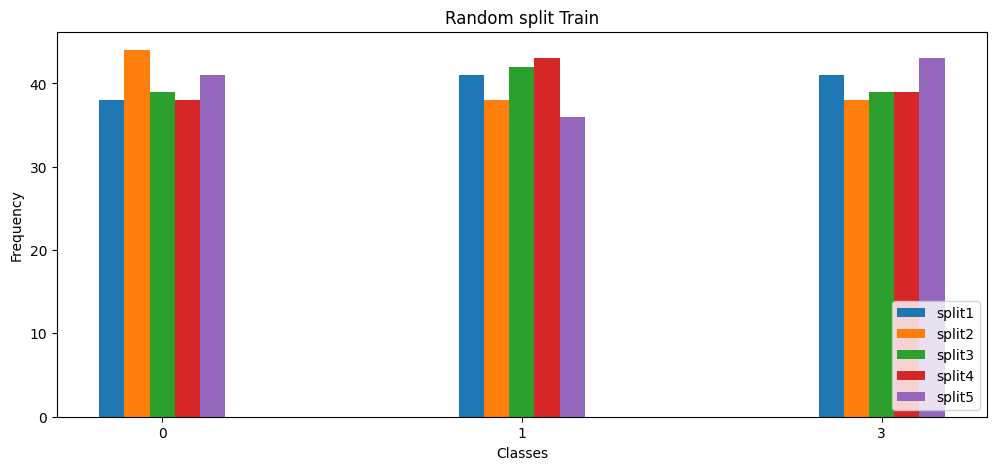

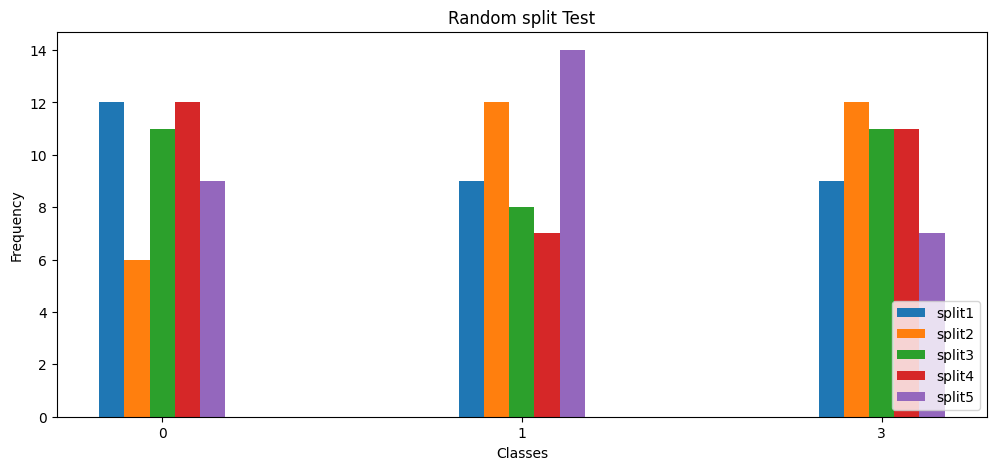

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bars(values, labels, width=0.35, title=""):
    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots(figsize=(12,5))
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Classes')
    ax.set_title(title)
    ax.set_xticks(x, labels)
    
    center = round(len(values)/2)
    for id_x, temp in enumerate(values):
        new_x = x + width/len(values) * (id_x-center)
        lab = 'split'+str(id_x+1)
        ax.bar(new_x, temp, width/len(values), label=lab)

    ax.legend(loc='lower right')
    plt.show()

split_train = []
split_test = []

for train_index, test_index in random_split.split(data.data):    
    split_train.append([ v for _, v in sorted(Counter(list(data.target[train_index])).items())])
    split_test.append([ v for _, v in sorted(Counter(list(data.target[test_index])).items())])


plot_bars(split_train, [0,1,3], title='Random split Train')

plot_bars(split_test, [0,1,3], title='Random split Test')

# Add some text for labels, title and custom x-axis tick labels, etc.



In [27]:
from sklearn.model_selection import StratifiedKFold

stratified_split = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in stratified_split.split(data.data, data.target):
    
    print("Samples per Class in Training: {}".format(dict(Counter(list(data.target[train_index])))))
    print("Samples per Class in Testing:  {}".format(dict(Counter(list(data.target[test_index])))))

Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing:  {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing:  {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing:  {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing:  {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing:  {0: 10, 1: 10, 2: 10}


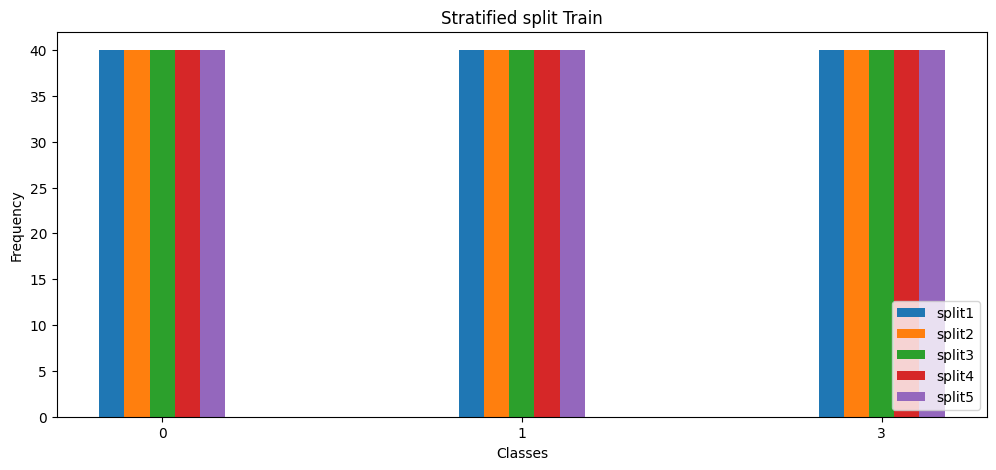

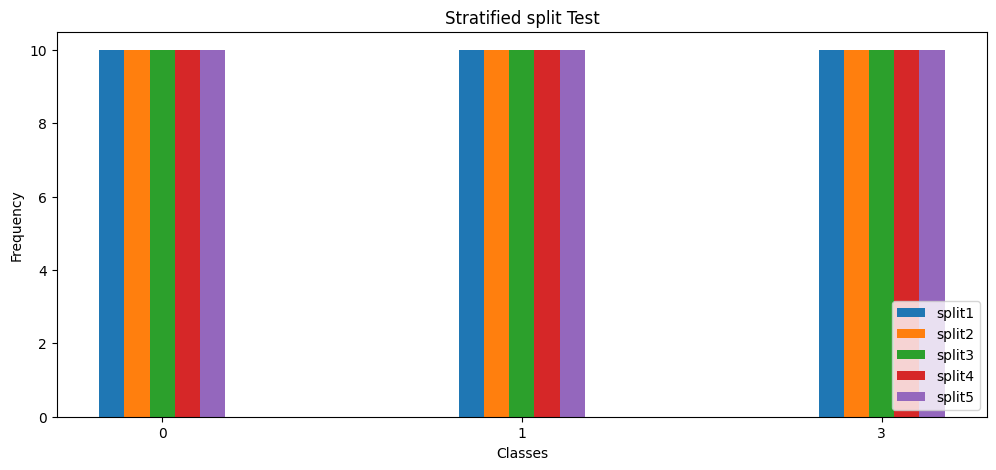

In [28]:
split_train = []
split_test = []
for train_index, test_index in stratified_split.split(data.data, data.target):    
    split_train.append([ v for _, v in sorted(Counter(list(data.target[train_index])).items())])
    split_test.append([ v for _, v in sorted(Counter(list(data.target[test_index])).items())])
    
plot_bars(split_train, [0,1,3], title='Stratified split Train')
plot_bars(split_test, [0,1,3], title='Stratified split Test')

### 3.3. Training and Testing the Model

#### 3.3.1. Classification Process

- Select the classification algorithm from [Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
- Train on training data
- Predict labels on testing data
- Score prediction comparing predicted and reference labels

In [32]:
from sklearn.naive_bayes import GaussianNB

# choose classification algorithm & initialize it
clf = GaussianNB()

# for each training/testing fold
for train_index, test_index in stratified_split.split(data.data, data.target):
    # train (fit) model
    clf.fit(data.data[train_index], data.target[train_index])
    # predict test labels
    clf.predict(data.data[test_index])
    # score the model (using average accuracy for now)
    accuracy = clf.score(data.data[test_index], data.target[test_index])
    print("Accuracy: {:.3}".format(accuracy))



Accuracy: 0.967
Accuracy: 0.867
Accuracy: 0.9
Accuracy: 0.967
Accuracy: 1.0


#### 3.3.2. Baselines

Scikit-learn provides baselines via `DummyClassifier` class that takes `strategy` argument. The following baselines can be obtaing:

- random baseline: `uniform`
- chance baseline: `stratified`
- majority baseline: `most_frequent`


In [43]:
from sklearn.dummy import DummyClassifier
print("Strategy: uniform")
random_clf = DummyClassifier(strategy="uniform")

for train_index, test_index in stratified_split.split(data.data, data.target):
    random_clf.fit(data.data[train_index], data.target[train_index])
    random_clf.predict(data.data[test_index])
    accuracy = random_clf.score(data.data[test_index], data.target[test_index])
    
    print("Accuracy: {:.3}".format(accuracy))


Strategy: uniform
Accuracy: 0.2
Accuracy: 0.4
Accuracy: 0.2
Accuracy: 0.4
Accuracy: 0.3


#### Exercise

Try `stratified` and `most_frequent` strategies and observe performances

In [81]:
# X = stratified or most_frequent

strategies = ["stratified", "most_frequent"]
for strategy in strategies:
    print(f"Strategy: {strategy}")
    dummy_clf = DummyClassifier(strategy=strategy)

    for train_index, test_index in stratified_split.split(data.data, data.target):
        dummy_clf.fit(data.data[train_index], data.target[train_index])
        dummy_clf.predict(data.data[test_index])
        accuracy = dummy_clf.score(data.data[test_index], data.target[test_index])
        
        print("Accuracy: {:.3}".format(accuracy))
    print()

Strategy: stratified
Accuracy: 0.433
Accuracy: 0.3
Accuracy: 0.367
Accuracy: 0.2
Accuracy: 0.333

Strategy: most_frequent
Accuracy: 0.333
Accuracy: 0.333
Accuracy: 0.333
Accuracy: 0.333
Accuracy: 0.333



#### 3.3.3. Better Classification Report

scikit-learn provides functions to report more informative performance values using [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# choose classification algorithm & initialize it
clf = GaussianNB()

# for each training/testing fold
for train_index, test_index in stratified_split.split(data.data, data.target):
    # train (fit) model
    clf.fit(data.data[train_index], data.target[train_index])
    # predict test labels
    hyps = clf.predict(data.data[test_index])
    refs = data.target[test_index]
    
    report = classification_report(refs, hyps, target_names=data.target_names)
    
    print(report)
    

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy        

#### 3.3.4. Cross-Validation Evaluation

The cross-validation procedure and function of scikit-learn are described in [the documentation](https://scikit-learn.org/stable/modules/cross_validation.html).

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# choose classification algorithm & initialize it
clf = GaussianNB()
# get scores
scores = cross_val_score(clf, data.data, data.target, cv=5) #cv 0 number of jobs

print(scores)


[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]


Cross-Validation using custom split and scoring.

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

# choose classification algorithm & initialize it
clf = GaussianNB()
# scoring providing our custom split & scoring using 
scores = cross_validate(clf, data.data, data.target, cv=stratified_split, scoring=['f1_macro'])

print(sum(scores['test_f1_macro'])/len(scores['test_f1_macro']))


0.9531819447608921


#### Exercise
- Read [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)
- Try different evaluation scores
    - For instance, change f1_macro with f1_micro or f1_weighted

In [120]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
import numpy as np

np.random.seed(111111) # set seed for reproducibility

clf = GaussianNB()
score_type = ['f1_macro', 'f1_micro', 'f1_weighted', 'precision_macro', 'accuracy','balanced_accuracy']
for score in score_type:
    print(f"Score type: {score}")
    scores = cross_validate(clf, data.data, data.target, cv=stratified_split, scoring=[score])

    print(sum(scores['test_'+score])/len(scores['test_'+score]))

Score type: f1_macro
0.9532497911445279
Score type: f1_micro
0.9466666666666667
Score type: f1_weighted
0.9599331662489557
Score type: precision_macro
0.9646464646464648
Score type: accuracy
0.9466666666666667
Score type: balanced_accuracy
0.96


### 3.4. Vectorizing Text

> The raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

Consequently, the additional step that **text classification** requires is vectorization that converts text into a vector of numerical values. `scikit-learn` provides several vectorization methods in `sklearn.feature_extraction` [module](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). Most commonly used ones are:

- Count Vectorization
- TF-IDF Vectorization

Problem:
    - We need to covert the string e.g. 'Hello World' into a matrix in which the rows are the vectors that represent the words. The the word-vector dimensionality, i.e. the number of columns, depends on the encoding method.

***one-hot encoding*** 
Result: 
```
      [
 Hello [0, 1],
 World [1, 0],
      ]
```

rows = words (vocabulary)<br>
columns = word-vector dimensionality

#### 3.4.1. Bag-of-Words Representation

[Count Vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) implements the following vectorization procedure. 

- *tokenizing* strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

- *counting* the occurrences of tokens in each document.

- *normalizing* and *weighting* with diminishing importance tokens that occur in the majority of samples / documents.

Each token is considered to be a __feature__ and the vector of all the token frequencies for a given document is considered a multivariate __sample__. Consequently, a corpus of documents is represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

> If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

The [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) implements both tokenization and occurrence counting in a single class, and it is possible to provide many parameters. 

It can take an external preprocessor or perform the following preprocessing steps (read documentation for details):

- __strip_accents__: remove accents and perform other character normalization during the preprocessing step.
- __lowercase__: convert all characters to lowercase before tokenizing.
- __stop_words__: apply a built-in stop word list for English is used. 
- __token_pattern__: regular expression denoting what constitutes a *token* for tokenization
- __ngram_range__: The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. (We will see ngrams the next lab)
- __max_df__: maximum frequency cut-off: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). 
- __min_df__: minimum frequency cut-off: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. 
- __vocabulary__: externally provided vocabulary
- __binary__: If True, all non zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts.

#### 3.4.2. [TF-IDF Vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)  
TF-IDF Vectorization = Count Vectorization + TF-IDF Transformation

> Transforms a count matrix to a normalized tf or tf-idf representation

> __Tf__ means term-frequency while __tf-idf__ means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

> The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

(Please refer to the documentation for the transformation formulas).

#### 3.4.3. Vectorization Example

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'who plays luke on star wars new hope',
    'show credits for the godfather',
    'who was the main actor in the exorcist',
    'find the female actress from the movie she \'s the man',
    'who played dory on finding nemo'
]

vectorizer = CountVectorizer()

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(corpus)
print(f"Feature names{vectorizer.get_feature_names_out()}") # print feature names
print(vectors.toarray())  # print numpy vectors

Feature names['actor' 'actress' 'credits' 'dory' 'exorcist' 'female' 'find' 'finding'
 'for' 'from' 'godfather' 'hope' 'in' 'luke' 'main' 'man' 'movie' 'nemo'
 'new' 'on' 'played' 'plays' 'she' 'show' 'star' 'the' 'wars' 'was' 'who']
[[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1]
 [0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 2 0 1 1]
 [0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 3 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1]]


In [127]:
test_corpus = [
    'who was the female lead in resident evil',
    'who played guido in life is beautiful'
]

# 'trained' vectorizer can be later used to transform the test set 
test_vectors = vectorizer.transform(test_corpus)
print(f"Feature names{vectorizer.get_feature_names_out()}") # print feature names
print(test_vectors.toarray())

Feature names['actor' 'actress' 'credits' 'dory' 'exorcist' 'female' 'find' 'finding'
 'for' 'from' 'godfather' 'hope' 'in' 'luke' 'main' 'man' 'movie' 'nemo'
 'new' 'on' 'played' 'plays' 'she' 'show' 'star' 'the' 'wars' 'was' 'who']
[[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]


## Lab Exercise: Text Classification

- Using Newsgroup dataset from `scikit-learn` train and evaluate Linear SVM (LinearSVC) model
- Experiment with different vectorization methods and parameters, experiment_id in parentheses:
    - `binary` of Count Vectorization (CountVect)
    - TF-IDF Transformation (TF-IDF)
    - Using TF-IDF
        - min and max cut-offs (CutOff)
        - wihtout stop-words (WithoutStopWords)
        - without lowercasing (NoLowercase)


In [2]:
# Import newsgroup dataset and Linear SVM Model
from sklearn.datasets import fetch_20newsgroups
from collections import Counter
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer

# Get the dataset
data = fetch_20newsgroups()
# Print the categories
print(f"Classes: {(len(list(data.target_names)))}")
print(f"Samples: {(len(data.data))}")
#print(f"Samples per Class: {(dict(Counter(list(data.target))))}")
# print(data.DESCR)

classification_algo = LinearSVC(C=0.1, max_iter=10000) #C default = 1
#stratified_split = StratifiedKFold(n_splits=5, shuffle=True)

vectorizer = CountVectorizer(binary=True)
# print((data.data[0]))
#print(len(data.target))

for train_index, test_index in stratified_split.split(data.data, data.target):
    split_train = []
    split_test = []
    
    for i in sorted(train_index):
        split_train.append(data.data[i])
    for i in sorted(test_index):
        split_test.append(data.data[i])

    train_vector = vectorizer.fit_transform(split_train)
    print(train_vector.shape)
    # train (fit) model
    classification_algo.fit(train_vector.toarray(), split_test)
    # predict test labels 
    classification_algo.predict(split_test)
    # score the model (using average accuracy for now)
    accuracy = classification_algo.score(train_vector, split_test)
    print("Accuracy: {:.3}".format(accuracy))

Classes: 20
Samples: 11314


NameError: name 'stratified_split' is not defined

# Data fetching

In [54]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score

# Data fetching
data_all = fetch_20newsgroups(subset='all')
print(len(data_all.data))


X_train, X_test, y_train, y_test = train_test_split(data_all.data, data_all.target, test_size=0.2, random_state=37)
classification_algo = LinearSVC(C=0.1, max_iter=10000) #C default = 1

18846


In [61]:
# Print the mean scores and standard deviations for each metric
def compute_and_print_metrics(clf, X, y, folding_algo):
    #scoring metrics
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    # cross-validation scores + metrics
    results = cross_validate(clf, X, y, cv=folding_algo, scoring=scoring, return_train_score=True)
    for metric in scoring:
        train_mean = results[f"train_{metric}"].mean()
        train_std = results[f"train_{metric}"].std()
        print(f"{metric.capitalize()} - Train: {train_mean:.3f} (+/- {train_std:.3f})")

# Counter Vectorizer

In [49]:
vectorizer = CountVectorizer(binary=True)
train_vector = vectorizer.fit_transform(X_train)
classification_algo.fit(train_vector, y_train)
test_vector = vectorizer.transform(X_test)
test_prediction = classification_algo.predict(test_vector)
# Another way
# accuracy = accuracy_score(y_test, test_prediction)
accuracy = classification_algo.score(test_vector, y_test)
print("Accuracy: {:.3}".format(accuracy))

Accuracy: 0.903


# TFIDF Vectorizer

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer()
train_vector = tfid_vectorizer.fit_transform(X_train)
classification_algo.fit(train_vector, y_train)
test_vector = tfid_vectorizer.transform(X_test)
test_prediction = classification_algo.predict(test_vector)
# Another way
# accuracy = accuracy_score(y_test, test_prediction)
accuracy = classification_algo.score(test_vector, y_test)
print("Accuracy: {:.3}".format(accuracy))

Accuracy: 0.904


# TF-IDF with boundaries

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer(min_df=2, max_df=6, stop_words=None,lowercase=False)
train_vector = tfid_vectorizer.fit_transform(X_train)
classification_algo.fit(train_vector, y_train)
test_vector = tfid_vectorizer.transform(X_test)
test_prediction = classification_algo.predict(test_vector)
# Another way
# accuracy = accuracy_score(y_test, test_prediction)
accuracy = classification_algo.score(test_vector, y_test)
print("Accuracy: {:.3}".format(accuracy))

Accuracy: 0.749



# Using TF-IDF and K fold

In [63]:
from sklearn.model_selection import StratifiedKFold
tfid_vectorizer = TfidfVectorizer()

stratified_split = StratifiedKFold(n_splits=5, shuffle=True)
split_index = 0
for train_index, test_index in stratified_split.split(data_all.data, data_all.target):
    split_train_x = []
    split_train_y = []
    split_test_x = []
    split_test_y = [] 

    for i in sorted(train_index):
       split_train_x.append(data_all.data[i])
       split_train_y.append(data_all.target[i])
    for i in sorted(test_index):
        split_test_x.append(data_all.data[i])
        split_test_y.append(data_all.target[i])

    train_vector = tfid_vectorizer.fit_transform(split_train_x)
    classification_algo.fit(train_vector, split_train_y)
    test_vector = tfid_vectorizer.transform(split_test_x)
    test_prediction = classification_algo.predict(test_vector)
    print(f"Split:{split_index}")
    compute_and_print_metrics(classification_algo, test_vector, split_test_y, stratified_split)
    split_index += 1
    print()
    

Split:0
Accuracy - Train: 0.986 (+/- 0.001)
Precision_macro - Train: 0.986 (+/- 0.001)
Recall_macro - Train: 0.983 (+/- 0.001)
F1_macro - Train: 0.984 (+/- 0.001)

Split:1
Accuracy - Train: 0.986 (+/- 0.001)
Precision_macro - Train: 0.986 (+/- 0.001)
Recall_macro - Train: 0.983 (+/- 0.001)
F1_macro - Train: 0.984 (+/- 0.001)

Split:2
Accuracy - Train: 0.986 (+/- 0.000)
Precision_macro - Train: 0.987 (+/- 0.000)
Recall_macro - Train: 0.983 (+/- 0.000)
F1_macro - Train: 0.984 (+/- 0.000)

Split:3
Accuracy - Train: 0.981 (+/- 0.001)
Precision_macro - Train: 0.982 (+/- 0.001)
Recall_macro - Train: 0.977 (+/- 0.001)
F1_macro - Train: 0.979 (+/- 0.001)

Split:4
Accuracy - Train: 0.987 (+/- 0.002)
Precision_macro - Train: 0.987 (+/- 0.002)
Recall_macro - Train: 0.984 (+/- 0.002)
F1_macro - Train: 0.985 (+/- 0.002)

